# 1. Importing Necessary Packages and Datasets 

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")



import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.impute import SimpleImputer
from impyute.imputation.cs import mice

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV






In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

ID = test['PassengerId']

In [3]:
n_train = train.shape[0]
n_test = test.shape[0]

full_data = pd.concat((train,test), ignore_index=True)
full_data.shape

(1309, 12)

In [4]:
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# 2. Exploratory Data Analysis

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
full_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
full_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## Ticket Class

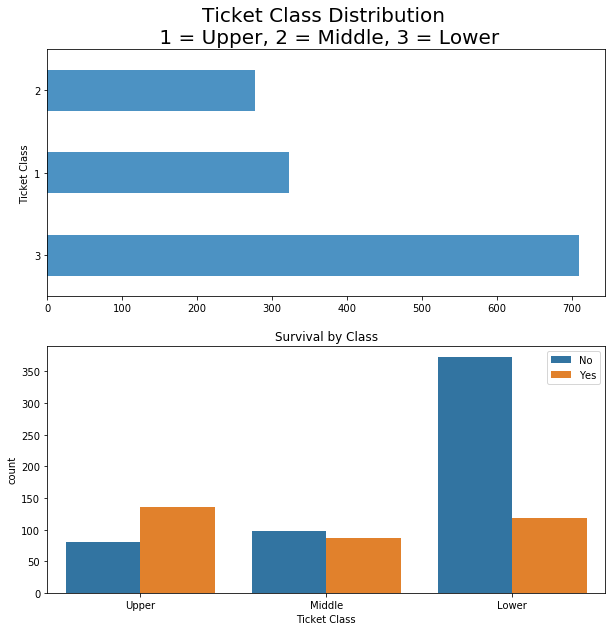

In [8]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(2,1,1)
full_data.Pclass.value_counts().plot(kind='barh', alpha=0.8)
ax1.set_ylabel('Ticket Class')
ax1.set_title('Ticket Class Distribution \n 1 = Upper, 2 = Middle, 3 = Lower', fontsize=20)

ax2 = plt.subplot(2,1,2)
sns.countplot(x='Pclass', hue='Survived', data=full_data)
ax2.set_xlabel('Ticket Class')
ax2.set_xticklabels(['Upper', 'Middle', 'Lower'])
ax2.set_title('Survival by Class')
ax2.legend(['No','Yes'])


## Age

Text(0.5, 1.0, 'Survival by Age')

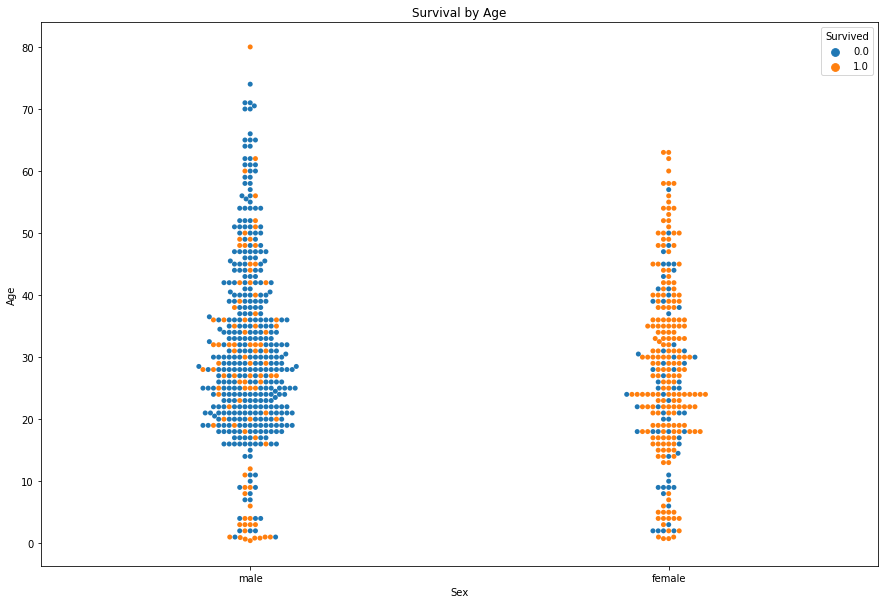

In [9]:
fig = plt.figure(figsize=(15,10))

sns.swarmplot(x='Sex', y='Age', hue='Survived',data=full_data)
plt.title('Survival by Age')

## Sex

Text(0.5, 1.0, 'Female Survival by Class')

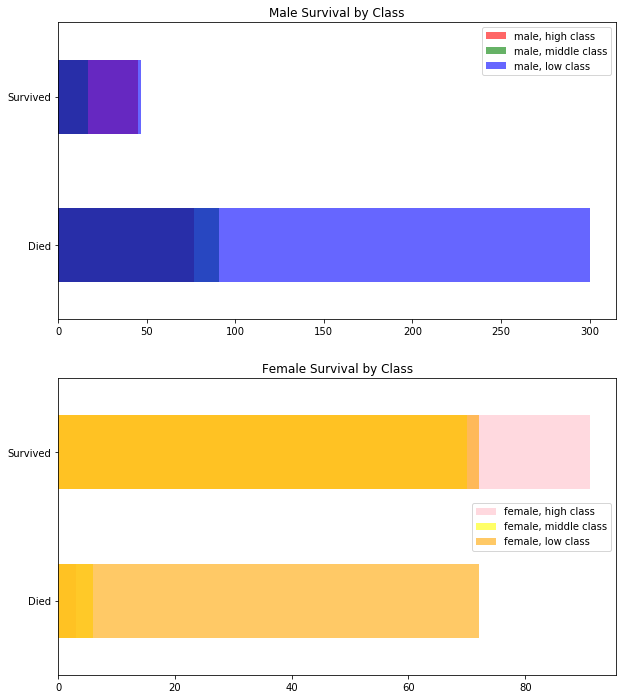

In [10]:
fig = plt.figure(figsize=(10,12))
                 
ax1 = plt.subplot(2,1,1)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 1].value_counts().sort_index().plot(kind='barh', color='red', label='male, high class', alpha=0.6)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 2].value_counts().sort_index().plot(kind='barh', color='green', label='male, middle class', alpha=0.6)
full_data.Survived[full_data.Sex == 'male'][full_data.Pclass == 3].value_counts().sort_index().plot(kind='barh', color='blue', label='male, low class', alpha=0.6)
ax1.set_yticklabels(['Died','Survived'])
plt.legend()
plt.title('Male Survival by Class')


ax2 = plt.subplot(2,1,2)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 1].value_counts().sort_index().plot(kind='barh', color='pink', label='female, high class', alpha=0.6)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 2].value_counts().sort_index().plot(kind='barh', color='yellow', label='female, middle class', alpha=0.6)
full_data.Survived[full_data.Sex == 'female'][full_data.Pclass == 3].value_counts().sort_index().plot(kind='barh', color='orange', label='female, low class', alpha=0.6)
ax2.set_yticklabels(['Died','Survived'])
plt.legend()
plt.title('Female Survival by Class')



## SibSp, Parch, and FamilySize

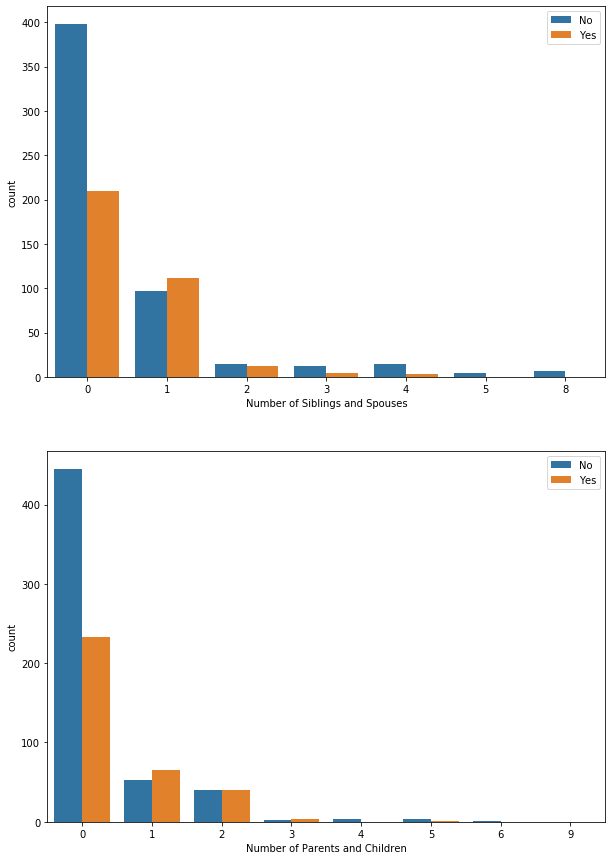

In [11]:
fig = plt.figure(figsize=(10,15))

ax1 = plt.subplot(2,1,1)
sns.countplot(x='SibSp', hue='Survived', data=full_data)
ax1.set_xlabel('Number of Siblings and Spouses')
ax1.legend(['No', 'Yes'], loc='upper right')

ax2 = plt.subplot(2,1,2)
sns.countplot(x='Parch', hue='Survived', data=full_data)
ax2.set_xlabel('Number of Parents and Children')
ax2.legend(['No', 'Yes'], loc='upper right')


## Embarked

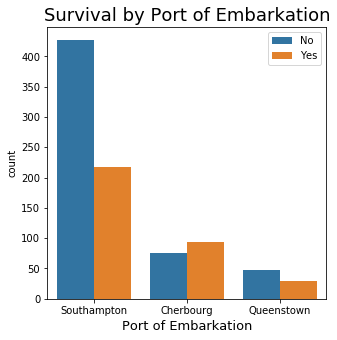

In [12]:
fig = plt.figure(figsize=(5,5))

ax1 = sns.countplot(x='Embarked', hue='Survived',data=full_data)
ax1.set_title('Survival by Port of Embarkation', fontdict= {'fontsize': 18})
ax1.set_xlabel('Port of Embarkation', fontdict= {'fontsize': 13})
ax1.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
ax1.legend(['No','Yes'], loc='upper right')

## Fare

Text(0.5, 1.0, 'Survival by Fare')

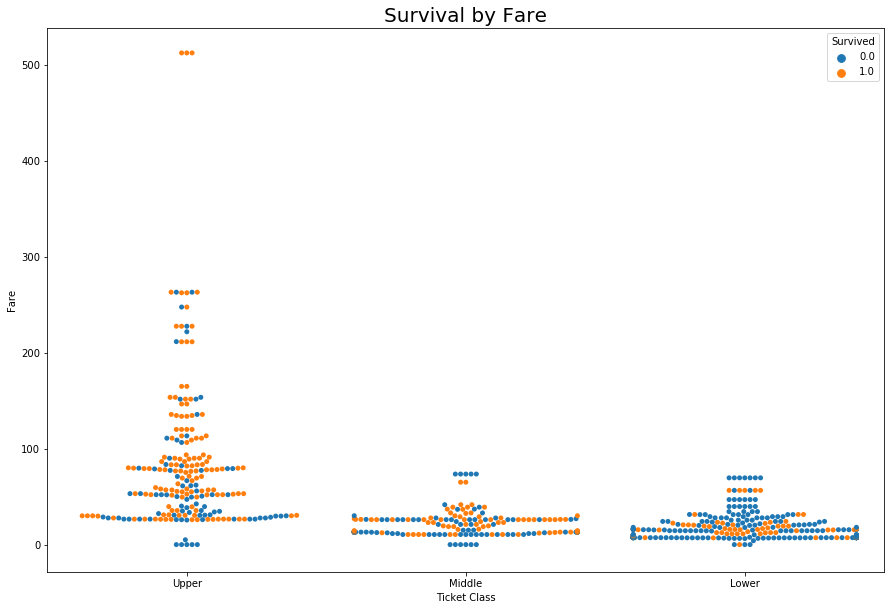

In [13]:
fig = plt.figure(figsize=(15,10))

ax1 = sns.swarmplot(x='Pclass', y='Fare', hue='Survived',data=full_data)
ax1.set_xlabel('Ticket Class')
ax1.set_xticklabels(['Upper', 'Middle', 'Lower'])
ax1.set_title('Survival by Fare', fontsize=20)

# 2. Feature Engineering

## Name

In [14]:
split_name = full_data['Name'].str.split(",")
titles = []
for name in split_name:
    title = name[1].split('.')[0].strip(' ')
    titles.append(title)
    
full_data['Title'] = titles
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [15]:
print(np.sort(full_data['Title'].unique()))

['Capt' 'Col' 'Don' 'Dona' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss'
 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']


In [16]:
pd.crosstab(full_data['Title'], full_data['Pclass'])

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,4,0,0
Don,1,0,0
Dona,1,0,0
Dr,6,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,5,11,45


In [17]:
pd.crosstab(full_data['Title'], full_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


### New classifications:
1. Male High Class $\longrightarrow$ male1 $\longrightarrow$ 1
    * Capt, Col, Don, Dr (if male and Pclass == 1), Jonkheer, Major, Master (if Pclass == 1), Mr (if Pclass == 1), Sir 


    
2. Female High Class $\longrightarrow$ female1 $\longrightarrow$ 2
    * Dona, Dr (if female and Pclass == 1), Lady, Miss (if Pclass == 1), Mlle, Mme, Mrs (if Pclass == 1), the Countess



3. Male Middle Class $\longrightarrow$ male2 $\longrightarrow$ 3
    * Dr (if male and Pclass == 2), Master (if Pclass == 2), Mr (if Pclass ==2), Rev
 
 
 
4. Female Middle Class $\longrightarrow$ female2 $\longrightarrow$ 4
    * Dr (if female and Pclass == 2), Miss (if Pclass == 2), Mrs (if Pclass == 2), Ms (if Pclass == 2)



5. Male Low Class $\longrightarrow$ male3 $\longrightarrow$ 5
    * Master (if Pclass == 3), Mr (if Pclass == 3)



6. Female Low Class $\longrightarrow$ female3 $\longrightarrow$ 6
    * Miss (if Pclass == 3), Mrs (if Pclass == 3), Ms (if Pclass == 3)

In [18]:
full_data['Title'] = full_data['Title'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Sir'], 1)
full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'male') & 
              (full_data.Pclass == 1), 'Title'] = 1
full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 1), 'Title'] = 1
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 1), 'Title'] = 1


full_data['Title'] = full_data['Title'].replace(['Dona', 'Lady', 'Mlle', 'Mme', 'the Countess'], 2)
full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'female') & 
              (full_data.Pclass == 1), 'Title'] = 2
full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 1), 'Title'] = 2
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 1), 'Title'] = 2


full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'male') & 
              (full_data.Pclass == 2), 'Title'] = 3
full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 2), 'Title'] = 3
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 2), 'Title'] = 3
full_data['Title'] = full_data['Title'].replace(['Rev'], 3)



full_data.loc[(full_data.Title == 'Dr') & (full_data.Sex == 'female') & 
              (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 2), 'Title'] = 4
full_data.loc[(full_data.Title == 'Ms') &  (full_data.Pclass == 2), 'Title'] = 4


full_data.loc[(full_data.Title == 'Master') &  (full_data.Pclass == 3), 'Title'] = 5
full_data.loc[(full_data.Title == 'Mr') &  (full_data.Pclass == 3), 'Title'] = 5


full_data.loc[(full_data.Title == 'Miss') &  (full_data.Pclass == 3), 'Title'] = 6
full_data.loc[(full_data.Title == 'Mrs') &  (full_data.Pclass == 3), 'Title'] = 6
full_data.loc[(full_data.Title == 'Ms') &  (full_data.Pclass == 3), 'Title'] = 6


In [19]:
full_data.astype({'Title': 'int64'}).dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title            int64
dtype: object

In [20]:
full_data.drop(['Name'], axis=1, inplace=True)

## Cabin and Ticket

In [21]:
cabin_df = full_data[full_data['Cabin'].notnull()]
cabin_df = cabin_df[['Cabin', 'Pclass']]
cabin_df.head()

,Cabin,Pclass
1,C85,1
3,C123,1
6,E46,1
10,G6,3
11,C103,1


In [22]:
print('Known Pclass == 3 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==3]['Cabin'].str[:1].unique()))

print('Known Pclass == 2 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==2]['Cabin'].str[:1].unique()))

print('Known Pclass == 1 unique values: {}' 
      .format(cabin_df[cabin_df['Pclass'] ==1]['Cabin'].str[:1].unique()))

Known Pclass == 3 unique values: ['G' 'F' 'E']
Known Pclass == 2 unique values: ['D' 'F' 'E']
Known Pclass == 1 unique values: ['C' 'E' 'A' 'B' 'D' 'T']


In [23]:
# Outlier 'T' 

cabin_df[cabin_df['Cabin'].str[:1] == 'T']

,Cabin,Pclass
339,T,1


### Observations
1. Cabin 
    * first letter has a range of 
        * A-E for Pclass == 1 ('T' is an outlier)
        * D-F for Pclass == 2
        * E-G for Pclass == 3 
    * has too many missing values (1014 from train and test combined) for any kind of imputing to 
        * make sense
        * avoid introducing unncessary variance and bias into the data
2. Ticket values seem very arbitrary and hold little to no significance to the analysis 



###  Dropping 'Cabin' and 'Ticket' from full_data

In [24]:
full_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
full_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,0,1,3,male,1,0.0,5
1,38.0,C,71.2833,0,2,1,female,1,1.0,2
2,26.0,S,7.9250,0,3,3,female,0,1.0,6
3,35.0,S,53.1000,0,4,1,female,1,1.0,2
4,35.0,S,8.0500,0,5,3,male,0,0.0,5


## Fare 

In [25]:
full_data['Fare'].fillna(full_data['Fare'].mean(), inplace=True)

## Embarked

In [26]:
full_data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [27]:
imp_mean = SimpleImputer(strategy='most_frequent')
embarked = pd.DataFrame(full_data['Embarked'])
imp_mean.fit(embarked)
imputed_embarked = imp_mean.transform(embarked)

In [28]:
full_data.drop(['Embarked'], axis=1, inplace=True)
full_data['Embarked'] = imputed_embarked

full_data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
full_data.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Embarked
0,22.0,7.2500,0,1,3,male,1,0.0,5,0
1,38.0,71.2833,0,2,1,female,1,1.0,2,1
2,26.0,7.9250,0,3,3,female,0,1.0,6,0
3,35.0,53.1000,0,4,1,female,1,1.0,2,0
4,35.0,8.0500,0,5,3,male,0,0.0,5,0


## Sex

In [29]:
full_data['Sex'] = full_data['Sex'].replace(['male', 'female'], [0,1])

## SibSp, Parch, and Family_Size

In [30]:
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch']
full_data.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Embarked,FamilySize
0,22.0,7.2500,0,1,3,0,1,0.0,5,0,1
1,38.0,71.2833,0,2,1,1,1,1.0,2,1,1
2,26.0,7.9250,0,3,3,1,0,1.0,6,0,0
3,35.0,53.1000,0,4,1,1,1,1.0,2,0,1
4,35.0,8.0500,0,5,3,0,0,0.0,5,0,0


In [31]:
full_data.drop(['SibSp','Parch'], axis=1, inplace=True)

## Age

In [32]:
mice_df = full_data[['Age','Fare','Pclass','Sex']].astype('float')

imputed_training=mice(mice_df.values)

imputed_mice_df = pd.DataFrame(imputed_training, columns=['Age', 'Fare', 'Pclass', 'Sex'])
imputed_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
Age       1309 non-null float64
Fare      1309 non-null float64
Pclass    1309 non-null float64
Sex       1309 non-null float64
dtypes: float64(4)
memory usage: 41.0 KB


In [33]:
full_data.drop(['Age'], axis=1, inplace=True)
full_data['Age'] = imputed_mice_df['Age']

## PassengerId

In [34]:
full_data.drop(['PassengerId'], axis=1, inplace=True)
full_data.head()

,Fare,Pclass,Sex,Survived,Title,Embarked,FamilySize,Age
0,7.2500,3,0,0.0,5,0,1,22.0
1,71.2833,1,1,1.0,2,1,1,38.0
2,7.9250,3,1,1.0,6,0,0,26.0
3,53.1000,1,1,1.0,2,0,1,35.0
4,8.0500,3,0,0.0,5,0,0,35.0


## Correlation Matrix

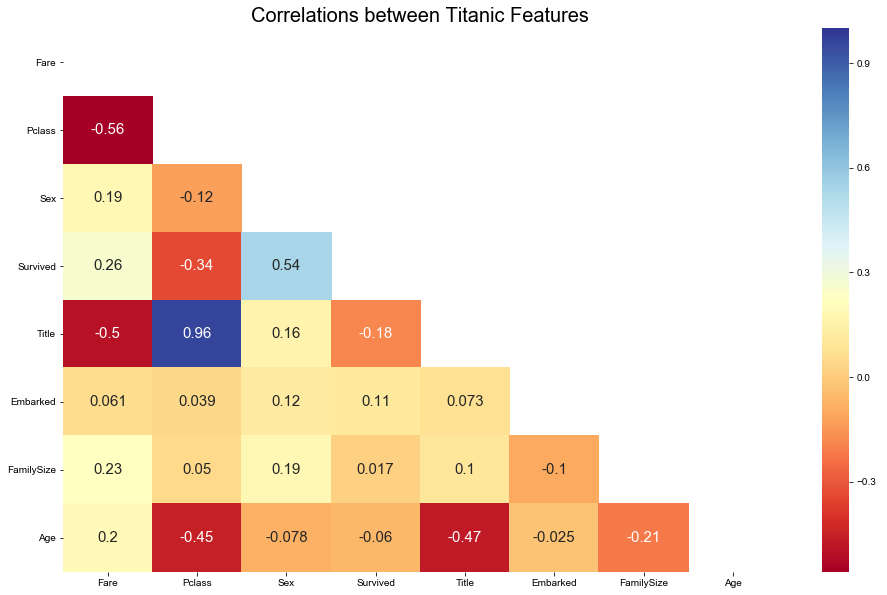

In [35]:
mask = np.zeros_like(full_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(full_data.corr(), mask=mask, annot=True, annot_kws={"size": 15}, cmap="RdYlBu")
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlations between Titanic Features', fontdict= {'fontsize': 20})
plt.show()

# 4. Machine Learning 

In [37]:
train = full_data[:n_train]
test = full_data[n_train:]

In [38]:
y_train = train['Survived'].values
X_train = train.drop(['Survived'], axis=1)
X_test = test.drop(['Survived'], axis=1)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
knn = KNeighborsClassifier()
log = LogisticRegression()
forest = RandomForestClassifier()
svc = SVC(probability=True)
xgb = XGBClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
tree = DecisionTreeClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()

classifiers = [knn, log, forest, svc, xgb, ada, gbc, tree, gnb, gpc]
scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    acc = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [41]:
performance = pd.DataFrame({'Model': ['K Nearest Neighbor', 'Logistic Regression', 'Random Forest', 'SVC',
                                     'XGBoost', 'AdaBoost', 'Gradient Boosting', 'Decision Trees', 'Gaussian NB', 
                                     'Gaussian Process'], 
                           'Score': scores})

performance_df = performance.sort_values(by='Score', ascending=False).reset_index(drop=True)
performance_df

,Model,Score
0,Gradient Boosting,0.835044
1,SVC,0.824919
2,Gaussian Process,0.815955
3,XGBoost,0.814844
4,AdaBoost,0.812634
5,Random Forest,0.810424
6,K Nearest Neighbor,0.808165
7,Logistic Regression,0.803620
8,Gaussian NB,0.777853
9,Decision Trees,0.775543


Text(0.5, 1.0, 'Classifier Algorithm Accuracy Score \n')

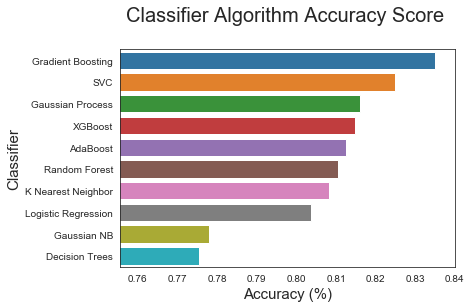

In [42]:
#plt.figure(figsize=(16,10), dpi=500) 
ax1 = sns.barplot(x='Score', y='Model', data=performance_df)
ax1.set_xlabel('Accuracy (%)', fontsize=15)
ax1.set_ylabel('Classifier', fontsize=15)
ax1.set_xlim(min(scores)-0.02, max(scores)+0.005)
ax1.set_title('Classifier Algorithm Accuracy Score \n', fontsize=20)

## 4.1 Feature Selection

In [43]:
imp_df = pd.DataFrame({'Feature':train.drop(['Survived'], axis=1).columns, 'gbc importance':gbc.feature_importances_,
                     'xgb importance':xgb.feature_importances_,
                     'forest importance':forest.feature_importances_,
                     'ada importance':ada.feature_importances_})

imp_df['Average'] = imp_df.mean(axis=1)

imp_df = imp_df.sort_values(by='Average', ascending=False).reset_index(drop=True)

imp_df

,Feature,gbc importance,xgb importance,forest importance,ada importance,Average
0,Sex,0.470981,0.593501,0.214283,0.08,0.339691
1,Age,0.131729,0.033437,0.283000,0.30,0.187042
2,Fare,0.151908,0.031939,0.249154,0.30,0.183250
3,Title,0.070326,0.026052,0.106163,0.20,0.100635
4,Pclass,0.079522,0.234974,0.046206,0.00,0.090176
5,FamilySize,0.077490,0.056070,0.071208,0.10,0.076192
6,Embarked,0.018044,0.024027,0.029985,0.02,0.023014


In [44]:
train = train.drop(['Embarked'], axis=1)
test = test.drop(['Embarked'], axis=1)

X_train = train.drop(['Survived'], axis=1)
X_test = test.drop(['Survived'], axis=1) 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
knn = KNeighborsClassifier()
log = LogisticRegression()
forest = RandomForestClassifier()
svc = SVC(probability=True)
xgb = XGBClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
tree = DecisionTreeClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()

classifiers = [knn, log, forest, svc, xgb, ada, gbc, tree, gnb, gpc]
scores_2 = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    acc = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_2.append(acc.mean())

In [46]:
performance_df['Score from feature selection'] = scores_2
performance_2 = performance_df.sort_values(by='Score from feature selection', ascending=False).reset_index(drop=True)
performance_2

,Model,Score,Score from feature selection
0,K Nearest Neighbor,0.808165,0.839526
1,Decision Trees,0.775543,0.828302
2,XGBoost,0.814844,0.826042
3,Gradient Boosting,0.835044,0.819413
4,Gaussian Process,0.815955,0.818265
5,Random Forest,0.810424,0.818252
6,AdaBoost,0.812634,0.814831
7,SVC,0.824919,0.801361
8,Logistic Regression,0.803620,0.782322
9,Gaussian NB,0.777853,0.765543


## 4.2 Hyperparameter Tuning

## K Nearest Neighbors

In [47]:
n_neigh = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
weights = ['uniform', 'distance']
algorithm = ['auto']
leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

tuned_parameters = {'n_neighbors': n_neigh, 'weights': weights, 'algorithm': algorithm, 
                     'leaf_size': leafs}

grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=tuned_parameters, 
                    verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8328464419475656
KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 3300 out of 3300 | elapsed:   16.1s finished


### Optimized Hyperparameters 
n_neighbors = 6 <br/>
weights = 'uniform' <br/>
algorithm 'auto' <br/>
leaf_size = 15

## Logistic Regression

In [48]:
penalty = ['l1', 'l2', 'elasticnet']
tol = [0.00001, 0.0001, 0.001]
Cs = np.logspace(0,5,10)

tuned_parameters = {'penalty': penalty, 'tol': tol, 'C': Cs}

grid = GridSearchCV(estimator = LogisticRegression(), param_grid=tuned_parameters,
                   verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8024843945068664
LogisticRegression(C=3.5938136638046276, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.8s finished


### Optimized Hyperparameters
penalty = 'l2' <br/>
tol = 1e-05 <br/>
C = 3.5938136638046276

## Random Forest

In [50]:
n_estimators = [1, 10, 25, 50, 75, 100]
max_depth = [3, None]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]
max_features = ['auto', 'log2', None]

tuned_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth,
                   'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features}

grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid=tuned_parameters,
                   verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8452059925093632
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 9000 out of 9000 | elapsed:  7.5min finished


### Optimized Hyperparameters
n_estimators = 75 <br/>
max_depth = None <br/>
min_samples_split = 8 <br/>
min_samples_leaf = 4 <br/>
max_features = 'None' 

## SVC

In [51]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                    'C': [0.001, 0.01, 1, 10, 100, 500, 1000]}]

grid = GridSearchCV(estimator = SVC(probability=True), param_grid=tuned_parameters, 
                    verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.832796504369538
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.1min finished


### Optimized Hyperparameters
kernel = 'rbf' <br/>
gamma = 0.1 <br/>
C = 10

## AdaBoost

In [52]:
n_estimators = [25, 50, 100, 200]
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2]

tuned_parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = tuned_parameters, 
                    verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   35.7s finished


0.8193008739076155
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=None)


### Optimized Hyperparameters
n_estimators = 200 <br/>
learning_rate = 0.1

## Gaussian Process

In [53]:
n_res_opt = [0, 1, 2, 4, 8]
max_iter_pred = [10, 25, 50, 100, 200]
warm_start = [True, False]

tuned_parameters = {'n_restarts_optimizer': n_res_opt, 'max_iter_predict': max_iter_pred,
                   'warm_start': warm_start}

grid = GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = tuned_parameters,
                   verbose=True, cv=10, scoring = 'accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.8min finished


0.828302122347066
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=10,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)


### Optimized Hyperparameters
n_restarts_optimizer = 0 <br/>
max_iter_predict = 10 <br/>
warm_start = True 

## Decision Tree

In [54]:
splitter = ['best', 'random']
max_depth = [1, 3, None]
min_samples_split = [1, 2, 4 ,6]
min_samples_leaf = [1, 2, 4, 6]
max_features = ['auto', 'log2', None]

tuned_parameters = {'splitter': splitter, 'max_depth': max_depth,
                    'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features}

grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = tuned_parameters,
                   verbose=True, cv=10, scoring = 'accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8339200998751559
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:    3.3s finished


### Optimized Hyperparameters
splitter = 'random' <br/>
max_depth = None <br/>
min_samples_split = 2 <br/>
min_samples_leaf = 2 <br/>
max_features = 'log2' 

## Gradient Boosting 

In [55]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
n_estimators = [100, 200, 500, 750, 1000, 1500]


tuned_parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

grid = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = tuned_parameters,
                   verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  4.4min finished


0.8429088639200998
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


learning_rate = 0.05 <br/> 
n_estimators = 200

In [56]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split = [1, 2, 3, 4, 5, 6]

tuned_parameters = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200),
                    param_grid = tuned_parameters,verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.2min finished


0.8429088639200998
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


max_depth = 3 <br/>
min_samples_split = 2

In [57]:
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

tuned_parameters = {'min_samples_leaf': min_samples_leaf}

grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                                                          max_depth=3, min_samples_split=2),
                    param_grid = tuned_parameters,verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8440449438202247
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.2s finished


min_samples_leaf = 7

In [59]:
max_features = ['auto', 'log2']

tuned_parameters = {'max_features': max_features}

grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                                                          max_depth=3, min_samples_split=2,
                                                          min_samples_leaf=7),
                    param_grid = tuned_parameters,verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished


0.8429213483146067
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


max_features = 'auto'

### Optimized Hyperparameters

learning_rate = 0.05 <br/>
n_estimators = 200 <br/>
max_depth = 3 <br/>
min_samples_split = 2 <br/>
min_samples_leaf = 7 <br/>
max_features = 'auto'

## XGBoost

In [60]:
n_estimators = [25, 50, 100, 150, 200, 500, 1000]
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

tuned_parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

grid = GridSearchCV(estimator = XGBClassifier(), param_grid = tuned_parameters, 
                    verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8417977528089887
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  1.9min finished


learning rate = 0.1 <br/>
n_estimators = 50

In [61]:
max_depth = [3,4,5,6,7,8,9,10]
min_child_weight = [1,2,3,4,5,6]

tuned_parameters = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

grid = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 50), 
                    param_grid = tuned_parameters, verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8474157303370786
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   23.1s finished


max_depth = 6 <br/>
min_child_weight = 4

In [62]:
gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

tuned_parameters = {'gamma': gamma}

grid = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 50,
                                             max_depth = 6, min_child_weight =4), 
                    param_grid = tuned_parameters, verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8474157303370786
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.6s finished


gamma = 0

In [63]:
subsample = [0.6, 0.7, 0.8, 0.9, 1]
colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1]

tuned_parameters = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 50,
                                             max_depth = 6, min_child_weight =4, 
                                              gamma =0), 
                    param_grid = tuned_parameters, verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8474157303370786
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   12.0s finished


subsample = 0.9 <br/>
colsample_bytree= 0.9

In [65]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

tuned_parameters = {'reg_alpha': reg_alpha}

grid = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 50,
                                             max_depth = 6, min_child_weight =4, 
                                              gamma =0, subsample=0.9, colsample_bytree=0.9), 
                    param_grid = tuned_parameters, verbose=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8485518102372035
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished


reg_alpha= 1

### Optimized Hyperparameters

learning rate = 0.1 <br/>
n_estimators = 50 <br/>
max_depth = 6 <br/>
min_child_weight = 4 <br/>
gamma = 0 <br/>
subsample = 0.9 <br/>
colsample_bytree= 0.9 <br/>
reg_alpha= 1

## Re-training

In [68]:
knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=15, 
                           n_neighbors=6, 
                           weights='uniform')

log = LogisticRegression(tol=1e-05, 
                         C=2.7825594022071245,
                         penalty='l2')

forest = RandomForestClassifier(n_estimators=75,
                             max_depth=None, 
                             max_features=None,
                             min_samples_leaf=4, 
                             min_samples_split=8,  
                             random_state=42)

svc = SVC(kernel='rbf', 
          gamma=0.1,
          C=10,
          probability=True)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=200,
                         random_state=42)

gpc = GaussianProcessClassifier(n_restarts_optimizer=0,
                               max_iter_predict=10,
                               warm_start=True)

tree = DecisionTreeClassifier(splitter='random',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=2,
                             max_features='log2')

gbc = GradientBoostingClassifier(learning_rate=0.05,
                                 n_estimators=200,
                                 max_depth=3,
                                 min_samples_split=2,
                                 min_samples_leaf=7,
                                 max_features='auto',
                                 random_state=42)

xgb = XGBClassifier(learning_rate=0.1, 
                    n_estimators=50,
                    max_depth=6,
                    min_child_weight=4,
                    gamma=0,
                    subsample=0.9,
                    colsample_bytree=0.9,
                    reg_alpha=1,
                    random_state=42)

gnb = GaussianNB()


classifiers = [knn, log, forest, svc, xgb, ada, gbc, tree, gnb, gpc]
scores_3 = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    acc = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_3.append(acc.mean())

In [69]:
performance_df['Score from hyperparameter tuning'] = scores_3
performance_3 = performance_df.sort_values(by='Score from hyperparameter tuning', ascending=False).reset_index(drop=True)
performance_3

,Model,Score,Score from feature selection,Score from hyperparameter tuning
0,K Nearest Neighbor,0.808165,0.839526,0.844045
1,AdaBoost,0.812634,0.814831,0.842946
2,Gaussian Process,0.815955,0.818265,0.840662
3,Gradient Boosting,0.835044,0.819413,0.832846
4,XGBoost,0.814844,0.826042,0.832797
5,Decision Trees,0.775543,0.828302,0.828302
6,Random Forest,0.810424,0.818252,0.819301
7,Logistic Regression,0.803620,0.782322,0.804719
8,SVC,0.824919,0.801361,0.802484
9,Gaussian NB,0.777853,0.765543,0.765543


In [70]:
print('Average Original Score: {}' .format(performance_3['Score'].mean()))
print('Average Score (feature selection): {}' .format(performance_3['Score from feature selection'].mean()))
print('Average Score (hyperparameter tuning: {}' .format(performance_3['Score from hyperparameter tuning'].mean()))

Average Original Score: 0.807900124843945
Average Score (feature selection): 0.8113857677902621
Average Score (hyperparameter tuning: 0.8213645443196004


## Voting Classifier

In [71]:
grid_hard = VotingClassifier(estimators = [('Random Forest', forest), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('AdaBoost', ada),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Decision Tree', tree),
                                           ('Gaussian Process', gpc)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

grid_hard_cv['test_score'].mean()

0.8305493133583021

In [72]:
grid_soft = VotingClassifier(estimators = [('Random Forest', forest), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('AdaBoost', ada),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Decision Tree', tree),
                                           ('Gaussian Process', gpc)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

grid_soft_cv['test_score'].mean()

0.8361797752808988

In [85]:
#result = gbc.predict(X_test)
result = knn.predict(X_test)
result_df = pd.DataFrame({'PassengerId': ID, 'Survived': result}).astype('int64')
result_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [86]:
result_df.to_csv("prediction.csv", index=False)

# 5. Work Log

## Version 1 
1.  Ignored Cabin, Ticket, Name 
2.  Removed all entries with missing values 
3.  Used Feature Selection to create new feature "FamilyMembers"
4.  Used KNN, Random Forest, Logistic Regression, and SVC without tuning hyperparameters
    * SVC achieved the highest cross-validation score


### Did not work since kaggle does not accept solutions with missing values removed. Must Impute!

## Version 2
1.  Combined train and test sets into a single DataFrame for EDA, Visualization, and Feature Engineering
2.  Ignored Cabin, Ticket, Name 
3.  Imputed 
    * __Embarked__ with Simple Imputer 
    * __Fare__ with mean
        * Fare only has one missing value so this does not significantly reduce variance or accuracy
    * __Age__ with MICE imputer with Fare, Pclass, Sex and regressors
4.  Used Feature Selection to create new feature __FamilyMembers__
    * Removed __SibSp__ and __Parch__
5.  Added __Decision Trees__, __XGBoost__, __AdaBoost__, and __Gradient Boosting__. 
    * __Gradient Boosting__ received the highest cross-validation accuracy score
6. Did not tune hyperparameters


### Score:  0.756

### Observations
* Need to convert both PassengerId and Survived to __int64__ for the _"prediction.csv"_
* Can feature engineer "Title" and "Last name" from __Name__

# Version 3
1. Engineered __"Title"__ feature
2. Trained model with new feature "Title"
3. Submitted prediction for scoring 
4. Used scikit-learn's feature importances 
    * __Embarked__ was shown to have the least importance 
5. Dropped Embarked
6. Retrained model and submitted predictions for scoring 


## Scores:
### 1. Gradient Boosting without feature selection:              0.76
### 2. Logistic Regression with feature selection and:        0.756
### 3. AdaBoost with feature selection and:                          0.76
### 4. Gradient Boosting with feature selection:                   0.79

### Observations
* Random Forest scored the highest cross-validation accuracy score, but actual score on kaggle was lower than the Gradient Boosting Algorithms

# Version 4
1. Added __Gaussian Process Classifier__
2. Used __GridSearchCV__ to tune hyperparameters
3. Used __VotingClassifier__ to make predictions for submission

## Scores:
### 1. Grid_hard + Voting:    0.78947
### 2. Grid_hard + Voting:     0.77033
### 3. Hyperparam + Gradient Boosting: 0.78947
### 4. Hyperparam + XGBoost: 0.77990
### 5. Hyperparam + AdaBoost: 0.77033
### 6. Hyperparam + Gaussian: 0.76076
### 7. Hyperparam + KNN: 0.76555

### Observations:
* __KNN__ achieved the highest cross-validation score but not on kaggle -> overfitting
* Using the Voting Classifier did not improve overall score 